In [1]:
import pandas as pd
import os
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
path=os.getenv('DFDATA')
path

'/gws/open/NYCOpenData/nycopendata/data'

In [3]:
data=pd.read_csv(path + '/dvm6-udsa/1473437627/dvm6-udsa.csv')
data=data.head(30)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,20,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
column=['Violation Location (Lot No.)','Violation Location (Block No.)']
newdata = pd.DataFrame(data, columns = column)
newdata=newdata.rename(columns={'Violation Location (Lot No.)':'lot','Violation Location (Block No.)':'block'})

In [5]:
#to_date = lambda x: pd.to_datetime(x)
to_float = lambda x: float(x)
newdata.block= newdata.block.apply(to_float)
newdata.lot= newdata.lot.apply(to_float)

In [6]:
newdata_noNa=newdata.dropna(axis=0, how='any').reset_index(drop=True)
newdata_noNa.head()

,lot,block
0,24.0,1992.0
1,71.0,1511.0
2,38.0,3187.0
3,15.0,3173.0
4,30.0,3191.0


AttributeError: 'PathCollection' object has no attribute 'set_xlabel'

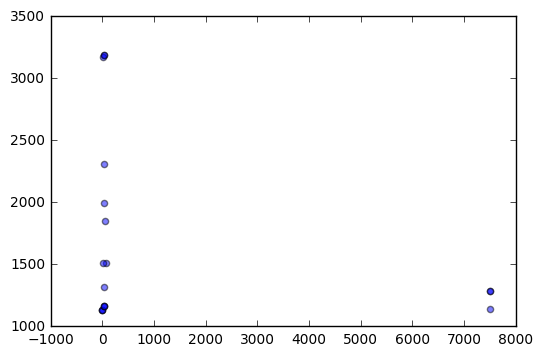

In [14]:
plot=plt.scatter(newdata_noNa.lot,newdata_noNa.block,alpha=0.5)
plot.set_xlabel('lot')
plot.set_ylabel('Block')

# EXTRA

In [28]:
data=pd.read_csv(path + '/dvm6-udsa/1473437627/dvm6-udsa.csv')
column=['Violation Date','Violation Location (Block No.)']

newdata2 = pd.DataFrame(data, columns = column)
newdata2=newdata2.rename(columns={'Violation Date':'Date','Violation Location (Block No.)':'Block'})

In [29]:
newdata.head()

,lot,block
0,NaN,NaN
1,NaN,NaN
2,24.0,1992.0
3,71.0,1511.0
4,38.0,3187.0


In [30]:
to_date = lambda x: pd.to_datetime(x)
to_float = lambda x: float(x)
newdata2.Date= newdata2.Date.apply(to_date)
newdata2.Block= newdata2.Block.apply(to_float)
newdata2_noNa=newdata2.dropna(axis=0, how='any').reset_index(drop=True)
newdata2_noNa.head()

,Date,Block
0,2007-05-10,1992.0
1,2007-07-11,1511.0
2,2009-02-18,3187.0
3,2009-03-07,3173.0
4,2016-01-13,3191.0


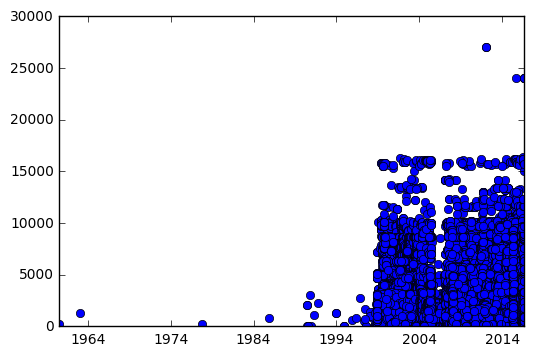

In [33]:
plt.plot_date(newdata2_noNa.Date,newdata2_noNa.Block)